# Chapter 1: Moving Average

In general, it's a good idea to start with simple models, and then introduce more complex ones over time. In this chapter, we introduce the simplest model, the moving average model, which will be used throughout the book. It is based on the simple idea that the future demand is similar to the recent demand we observed. The idea can be expressed with the formula:

$$f_t = \frac{1}{n} \sum_{i=1}^{n}d_{t-i},$$

where:
- $f_t$: forecast for period $t$
- $n$ is the number of periods for which we calculate the average,
- $d_t$ is the demand during period $t$.

Once we are out of the historical period, we simply define any future forecast as the last forecast that was computed based on historical demand. This means that, with this model, the future forecast is flat. This will be one of the major restrictions of this model: its inability to extrapolate any trend.

A special case of the moving average is the *naive forecast*, which always predicts the last possible observation. It is interesting as it will instantly react to any variation in the demand, but it is also very sensitive to noise and outliers. In order to decrease the sensitivity, we can go for a moving average based on more previous demand observations ($n > 1$). As $n$ increases, the model will also take more time to react to a change in the demand level. 

## Limitations

There are three main limitations at the core of a moving average:
1. no trend: the model does not see any trend,
2. no seasonality: the model will not properly react to seasonality,
3. flat historical weighting: moving average allocates equal weight to all historical periods taken into account. It could be argued that more recent observations are "more valuable", and should thus have more weight associated with them.


In [11]:
import numpy as np
import pandas as pd

def moving_average(d: list, extra_periods: int = 1, n: int = 3) -> list:
    """
    Performs moving average for extra_periods in the future based on time series
    data in d.
    @input:
        d: time series data
        extra_periods: number of periods in the future to forecast
        n: number of periods to use in the moving average calculation
    @output:
        moving average forecast in a list
    """

    cols = len(d)
    d = np.append(d, [np.nan] * extra_periods)
    f = np.full(cols + extra_periods, np.nan)

    for t in range(n, cols):
        f[t] = np.mean(d[t - n:t])

    f[t+1:] = np.mean(d[t-n+1:t+1])

    print(d[t-n+1:t+1])

    df = pd.DataFrame.from_dict({
        "demand": d,
        "forecast": f,
        "error": d - f,
    })

    return df

time_series = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = moving_average(time_series, extra_periods=4, n=3)


[13. 10. 12.]


<Axes: title={'center': 'Moving average'}, xlabel='Period'>

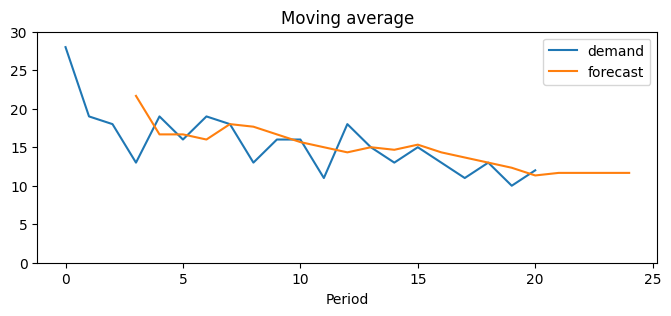

In [21]:
import matplotlib.pyplot as plt

df.index.name="Period"
df[["demand", "forecast"]].plot(figsize = (8, 3), title="Moving average", ylim=(0, 30))
